# Decision Trees and Random Forests Project

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

In [5]:
df = pd.read_csv('loan_data.csv')

In [6]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [9]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## Exploratory Data Analysis (EDA)

In [11]:
sns.set_style('whitegrid')

Text(0.5, 0, 'FICO')

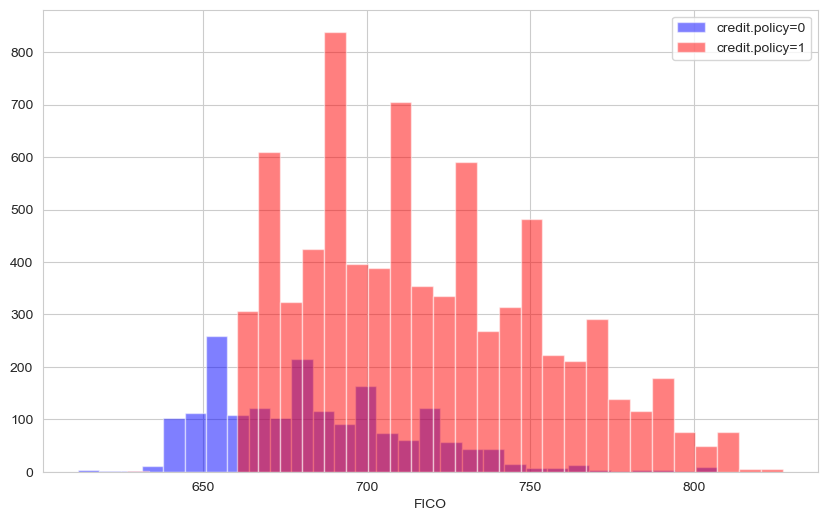

In [12]:
plt.figure(figsize=[10,6])
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='blue',bins=30,label='credit.policy=0')
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='red',bins=30,label='credit.policy=1')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

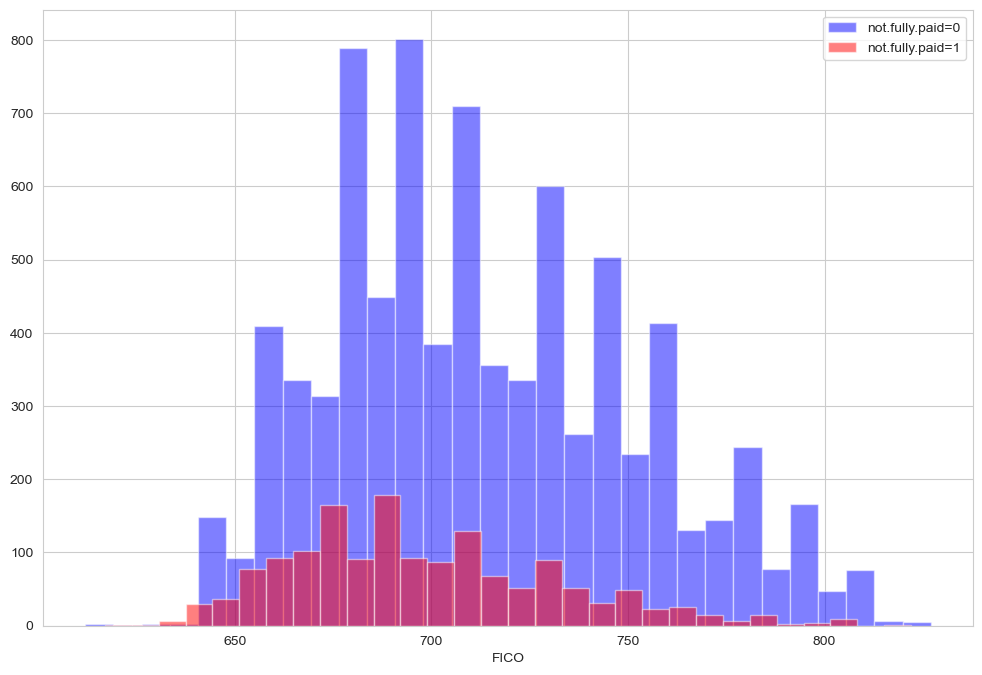

In [13]:
plt.figure(figsize=[12,8])
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=0')
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='red',bins=30,label='not.fully.paid=1')
plt.legend()
plt.xlabel('FICO')

<Axes: xlabel='purpose', ylabel='count'>

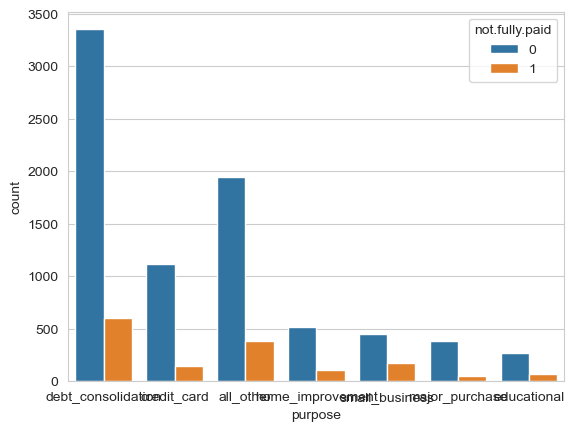

In [14]:
sns.countplot(x='purpose',data=df,hue='not.fully.paid')

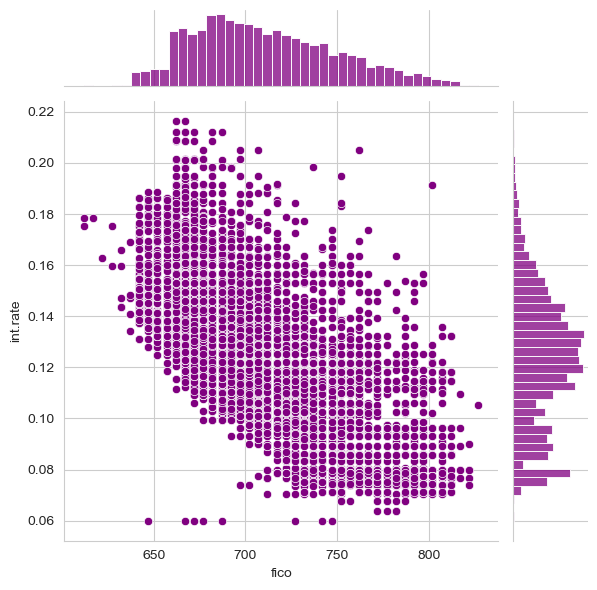

In [15]:
sns.jointplot(x='fico',y='int.rate',data=df,color='purple')

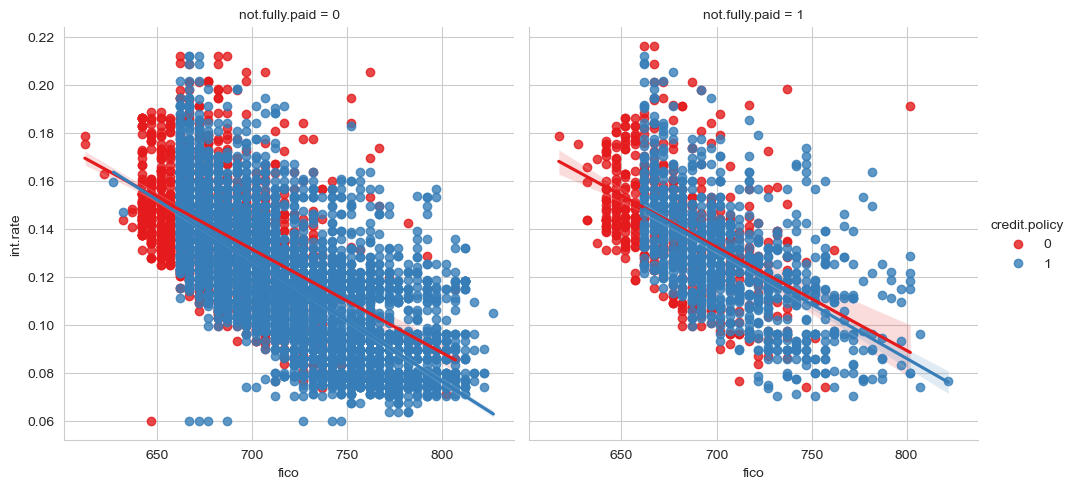

In [16]:
sns.lmplot(x='fico',y='int.rate',data=df,col='not.fully.paid',hue='credit.policy',palette='Set1')

# Setting up the Data

## Categorical Features

In [19]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [20]:
purpose = pd.get_dummies(df['purpose'],drop_first=True)

In [21]:
purpose

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
9573,0,0,0,0,0,0
9574,0,0,0,0,0,0
9575,0,1,0,0,0,0
9576,0,0,0,1,0,0


In [22]:
df.drop(['purpose'],axis=1,inplace=True)

In [23]:
final_data = pd.concat([df,purpose],axis=1)

In [24]:
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


## Train Test Split


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(final_data.drop(['not.fully.paid'],axis=1), final_data['not.fully.paid'], test_size=0.33, random_state=101)

## Training a Decision Tree Model

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dtree = DecisionTreeClassifier()

In [31]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree

In [33]:
prediction = dtree.predict(X_test)

In [34]:
df_eval = pd.DataFrame({'Label': y_test,'Predicrions':prediction})

In [35]:
df_eval

,Label,Predicrions
5244,0,0
1739,0,1
2780,0,0
7062,0,1
6661,0,0
...,...,...
6729,0,0
8884,0,0
4021,0,0
4810,0,0


In [36]:
print(dtree.score(X_test,y_test))

0.7291996203732996


In [37]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,prediction))

[[2182  484]
 [ 372  123]]


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2666
           1       0.20      0.25      0.22       495

    accuracy                           0.73      3161
   macro avg       0.53      0.53      0.53      3161
weighted avg       0.75      0.73      0.74      3161



## Training the Random Forest model

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc = RandomForestClassifier()

In [42]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

## Predictions and Evaluation of Random Forest

In [44]:
rfc_pred = rfc.predict(X_test)

In [45]:
df_eval=pd.DataFrame({'Label': y_test,'Predicrions':rfc_pred})
df_eval

,Label,Predicrions
5244,0,0
1739,0,0
2780,0,0
7062,0,0
6661,0,0
...,...,...
6729,0,0
8884,0,0
4021,0,0
4810,0,0


In [46]:
print(rfc.score(X_test,y_test))

0.8427712749130022


In [47]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,rfc_pred))

[[2653   13]
 [ 484   11]]


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.91      2666
           1       0.46      0.02      0.04       495

    accuracy                           0.84      3161
   macro avg       0.65      0.51      0.48      3161
weighted avg       0.79      0.84      0.78      3161



In [49]:
X = final_data.drop('not.fully.paid',axis=1)
pd.DataFrame({'Features':X.columns,'Values':rfc.feature_importances_}).sort_values('Values',ascending=False)

,Features,Values
2,installment,0.117043
6,days.with.cr.line,0.113457
8,revol.util,0.113140
7,revol.bal,0.111946
4,dti,0.110219
3,log.annual.inc,0.108116
1,int.rate,0.103158
5,fico,0.077756
9,inq.last.6mths,0.053669
0,credit.policy,0.015626
